In [33]:
import numpy as np
from matplotlib import pyplot as plt
from lqfn.quantum_systems import NonRelativisticSingleParticle1D

Calculation of the propagator for a one dimensional anharmonic oscillator, meaning that the potential is
$$
    V(x) = \frac{x^4}{4}
$$

In [34]:
N=20
a=0.5
eps=1.4
N_cor=20
N_cf=1000
N_copies = 10

In [35]:
t = np.arange(N-1) * a

In [36]:
def S_per_timeslice_quartic_potential(j,x): # harm. osc. S
    jp = (j+1)%N # next site
    jm = (j-1)%N # previous site
    return a*x[j]**4/4 + x[j]*(x[j]-x[jp]-x[jm])/a

In [37]:
def quartic_potential(x):
    return x**4/4

In [38]:
anharmonic_oscillator = NonRelativisticSingleParticle1D(T=a*N, N=N, V = quartic_potential, S_per_timeslice = S_per_timeslice_quartic_potential)

In [44]:
x = np.zeros
x = anharmonic_oscillator.solve_schrodinger(100,2)

Computing...
Took 0.007934331893920898


Calculation of the correlation function 
$$
    G(t) = \frac{1}{N} \sum_j \langle x(t_j+t)x(t_j) \rangle
$$ 
using bootstrap procedure.

In [40]:
def compute_G(x,n):
    g = 0
    for j in range(0,N):        
        g = g + x[j]*x[(j+n)%N]
    return g/N

In [41]:
average_delta_E_with_bootstrap, std_delta_E_with_boostrap = anharmonic_oscillator.compute_delta_E(compute_G, N_cf, N_cor, eps, N_copies=N_copies)

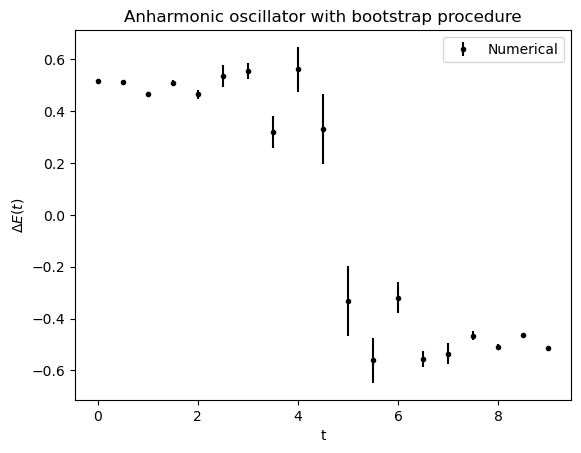

In [42]:
#plt.plot(t[:7], E_exact[:7] ,'b',label='Expected')
plt.errorbar(t, average_delta_E_with_bootstrap, yerr=std_delta_E_with_boostrap,color='black' ,label='Numerical',fmt='.')
plt.legend(loc='upper right')
plt.title('Anharmonic oscillator with bootstrap procedure')
plt.xlabel('t')
plt.ylabel(r'$\Delta E(t)$')
plt.show()